In [1]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
import numpy as np
from glob import glob

Using TensorFlow backend.


In [2]:
size=[224,224]
train_path = '/content/drive/My Drive/Data/Train'
valid_path = '/content/drive/My Drive/Data/Test'

In [3]:
vgg = VGG16(input_shape=size + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
  layer.trainable = False

In [5]:
folders = glob('/content/drive/My Drive/Data/Train/*')

In [6]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_gen = ImageDataGenerator(rescale = 1./255)


In [12]:
train_set = train_gen.flow_from_directory('/content/drive/My Drive/Data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_gen.flow_from_directory('/content/drive/My Drive/Data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 320 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


In [13]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set))

Epoch 1/10
10/10 [==============================] - 10s 999ms/step - loss: 1.5599 - accuracy: 0.5031 - val_loss: 1.4263 - val_accuracy: 0.3571
Epoch 2/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6422 - accuracy: 0.7094 - val_loss: 0.2211 - val_accuracy: 0.9286
Epoch 3/10
10/10 [==============================] - 4s 443ms/step - loss: 0.2531 - accuracy: 0.9187 - val_loss: 0.1349 - val_accuracy: 0.9643
Epoch 4/10
10/10 [==============================] - 4s 442ms/step - loss: 0.1341 - accuracy: 0.9781 - val_loss: 0.1248 - val_accuracy: 0.9643
Epoch 5/10
10/10 [==============================] - 4s 440ms/step - loss: 0.0806 - accuracy: 0.9906 - val_loss: 0.0782 - val_accuracy: 0.9643
Epoch 6/10
10/10 [==============================] - 4s 434ms/step - loss: 0.0575 - accuracy: 0.9937 - val_loss: 0.0690 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 4s 441ms/step - loss: 0.0477 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch

In [14]:
import matplotlib.pyplot as plt


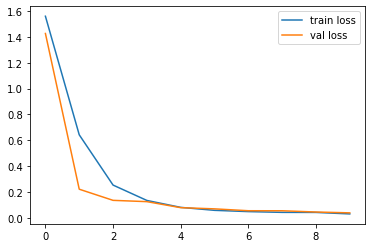

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

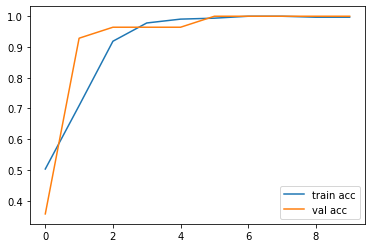

In [16]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [17]:
model.save('facefeature_snew_model2.h5')